In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

from scipy.io import loadmat

2025-04-30 17:34:13.897858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#load + preview data

matrixVar = loadmat("Xtrain.mat")
train_data = matrixVar['Xtrain']


In [4]:
train_data.shape

#There are 1000 entries in the 1d-array

(1000, 1)

In [5]:
#scale the data to [0, 1] using the MinMaxScaler() - assignment requirement
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data)

In [6]:
# prep input sequences with hyperparameter k where k is the 
# number of previous steps that are looked back on

#To explore this parameter, we should implement a hyperparameter loop to find an optimal k

# Set lookback window
k = 5

# Prepare sequences
# Each X[i] contains k previous time steps, y[i] is the next value to predict
X, y = [], []
for i in range(len(scaled_data) - k):
    X.append(scaled_data[i:i+k])
    y.append(scaled_data[i+k])

X = np.array(X)
y = np.array(y)



In [8]:
# Reshape input to [num of samples, time steps/input length, number of features]
# RNNs expect a 3D input: (number of sequences, sequence length, number of features per time step)
# Here: each sequence has 'k' time steps, and each time step has 1 feature (the scaled number)

X = X.reshape((X.shape[0], X.shape[1], 1))

(995, 5, 1)

In [25]:
# Build the RNN model
# - SimpleRNN layer with 50 units and ReLU activation
# - Dense layer with 1 output unit for regression (predicting a single value)

model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(k, 1)),
    Dense(1)
])

# Compile the model with Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse')

/Users/jessica/Documents/GitHub/INFOMDLR_Assign1/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# Train the model for 200 epochs on the training data
history = model.fit(X, y, epochs=200, verbose=0)

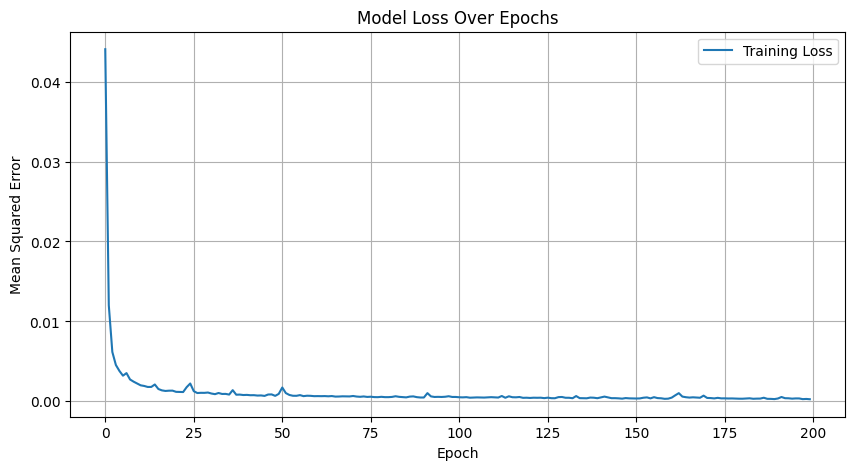

In [27]:
# Plot training loss over epochs for visual evaluation
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Predict the training set outputs to evaluate model performance
predicted_scaled_all = model.predict(X)

# Inverse transform predictions and targets back to original scale for evaluation
predicted_all = scaler.inverse_transform(predicted_scaled_all)
y_true = scaler.inverse_transform(y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [29]:
mse_per_prediction = [mean_squared_error(y_true[i:i+1], predicted_all[i:i+1]) for i in range(len(y_true))]


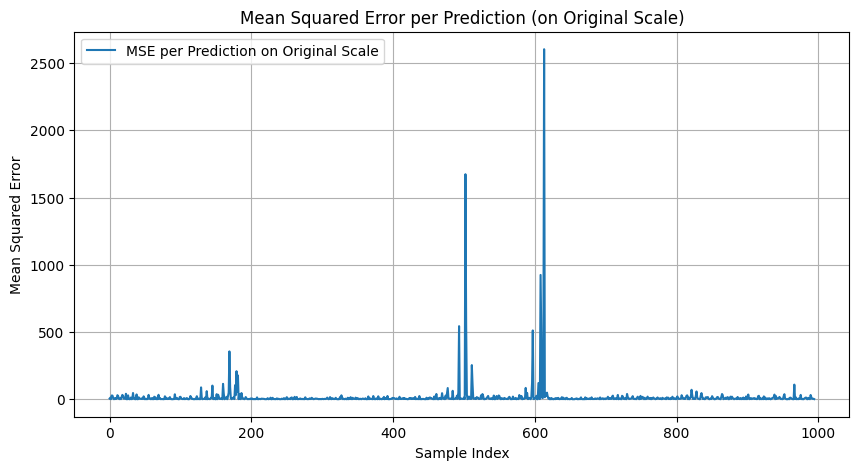

In [30]:
# Plot MSE for each prediction on the original scale
plt.figure(figsize=(10, 5))
plt.plot(mse_per_prediction, label='MSE per Prediction on Original Scale')
plt.title('Mean Squared Error per Prediction (on Original Scale)')
plt.xlabel('Sample Index')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Evaluate model performance using Mean Squared Error on original scale
mse = mean_squared_error(y_true, predicted_all)
print(f"Training Mean Squared Error on Original Scale: {mse:.4f}")

Training Mean Squared Error on Original Scale: 16.5893
